### **EDA аналіз**###

Якби ми жили в ідеальному світі то застосовувати чистку даних не потрібно було б проводити їх первинний аналіз на предмет наявності аномалій. Але ми живемо не в ідеальному світі, тому перед початком роботи алгоритма проведемо аналіз даних на аномалій.

Ціль цих дій це максимально почистити наші дані від нерелевантних значень, що дозволить в подальшому оптимізувати наш алгорим, оскільки перший запуск дав нам недостаньо точні дані на нашу думку.

In [ ]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
%matplotlib inline
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TEST TASK (dataset).csv')
df.head()
print(len(df))

1467832



# **Підготовка даних до аналізу** #

### N/a та відємні значення ###

Першим кроком до роботи з даними для подальшої роботи наших алгоритмів буде знаходження та фільтрація даних з значеннями n/a. В наступному полі представлені кількість записів з n/a значеннями в процентному співвідношені.


In [ ]:
df.isna().sum() / len(df) * 100

Як ми бачимо з результатів відсосток таких значень нижче 0,01%, що дає нам можливість стверджувати, що це "викид" і він не має ніякого впливу на наші прогнозовані значення.

Виходячи з цієї гіпотези ми можемо з легкістю видаляти такі значення в наших даних для покращення роботи наших алгоритмів.

Також ми створили графік розподілу значень в колонках 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30' від 'total_sessions_day7' , що дозволяє нам продемонструвати, що немає ніякої кореляції.

Це підтверджує нашу теорію та дозволяє видалити рядки з значеннями n/a.


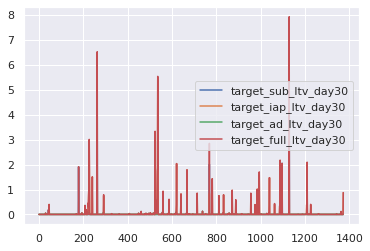

In [ ]:
df[df['total_sessions_day7'].isna()][['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']].reset_index(drop=True).plot()

Виявляємо від'ємні значення там, де їх бути не може бути. Виведемо ті поля, що мають від'ємні значення, при цьому проводимо аналіз та перевірку усіх наявних столбців.

In [ ]:
df[(df['total_sessions_day7'] < 0) |
   (df['chapters_finished_day7'] < 0) | (df['chapters_opened_day7'] < 0) | (df['chapters_closed_day7'] < 0) |
   (df['diamonds_received_day7'] < 0) | (df['diamonds_spent_day7'] < 0) | (df['tickets_spent_day7'] < 0) |
   (df['chapters_finished_session9'] < 0) | (df['chapters_opened_session9'] < 0) | (df['chapters_closed_session9'] < 0) |
   (df['diamonds_spent_session9'] < 0) | (df['tickets_spent_session9'] < 0) |
   (df['app_sub_ltv_day3'] < 0) | (df['app_iap_ltv_day3'] < 0) | (df['ad_ltv_day3'] < 0) |
   (df['target_sub_ltv_day30'] < 0) | (df['target_iap_ltv_day30'] < 0) | (df['target_ad_ltv_day30'] < 0) | (df['target_full_ltv_day30'] < 0)][
       ['diamonds_spent_day7', 'tickets_spent_day7', 'diamonds_spent_session9',
        'app_sub_ltv_day3',
        'target_sub_ltv_day30', 'target_full_ltv_day30']
   ]

,diamonds_spent_day7,tickets_spent_day7,diamonds_spent_session9,app_sub_ltv_day3,target_sub_ltv_day30,target_full_ltv_day30
324112,17,3,107,-2.829604,-2.829604,-2.777195
374828,-364,-4,0,0.000000,0.000000,0.000000
449835,-955,-7,-29,0.000000,0.000000,0.303770
1026084,679,12,679,-0.619771,-0.619771,8.514784


Як бачимо з результатів ці значення яквля.ться виключенням з правил ніж правилом, оскільки ми отримали лише 4 записи з 1.5 міліонів записів, що складає 0,0002%. Це дуже малий результат тому ми видалимо ці дані для того щоб зменшити кількість викидів для оптимізації роботи алгоритма прогнозування.


Задля полегшення роботи працівників над цим проектом та для оптимізації роботи алгоритма був написаний фільтр через який будуть проходити дані перед тим як потрапити до алгоритма.

Результати фільтрації будуть повідомлені працівникам у вигляді повідомлення в консолі.

### Викиди та адекватні діапазони ###

В цьому розділі будемо розглядати аномалії наших даних та викиди, що заважають роботі наших алгоритмів в майбутньому.

Проаналізуємо якак кількість клієнтів від загальної кількості принесла дохід більше за 1 цент. Отримали наступні результати.


In [ ]:
'%.3f' % (len(df[df['target_full_ltv_day30'] >= 0.01]) / len(df) * 100)


'16.154'

Всього навсього 16 відсотків користувачів приносять прибуток компанії. Не маємо статистики по іншим продуктам, але нам здається це невелика сума і цей результат потребує покращення.

В подальшому будуть надані деякі поради по зміні бізнес ппроцесів, що можуть зменшити видатки та збільшити прибутки.

Також перевіримо чи є викиди та нераціональні дані, що будуть заважати роботі алгоритмів.

Першим перевіримо кількість сесій за день.

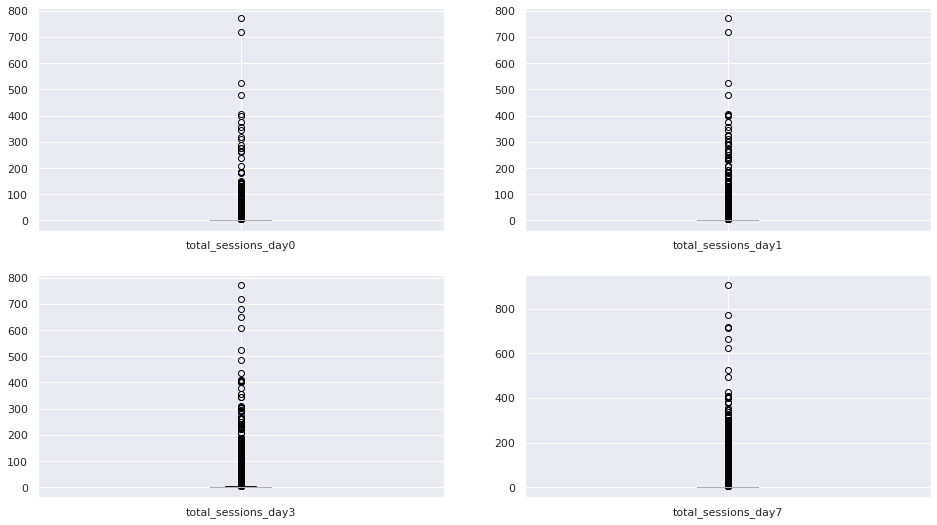

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)

df_subset = df[['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7']]

for i, el in enumerate(df_subset.columns.values):
    df.boxplot(el, ax=axes.flatten()[i])

Як ви бачите з показаних розподілів адекватним діапазоном цих змінних будемо вважати від 0 до 100, оскільки усі інші дані це одиничні випадки, що є схожими на шахрайство(приблизно 1 сесія на 2 хвилини).

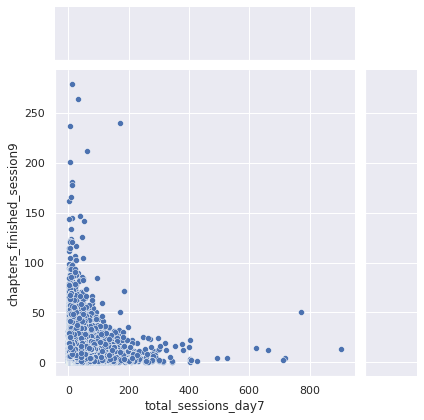

In [ ]:
sns.jointplot(x = 'total_sessions_day7', y = 'chapters_finished_session9', data = df)

Як бачите з результатів, що ми отримали за допомогою графіка також підтверджують нашу теорії про обмеження діапазонів до 100 сесій, оскільки саме в цьому діапазоні знаходиться найбільше користувачів, що завершили адекватну кількість глав.

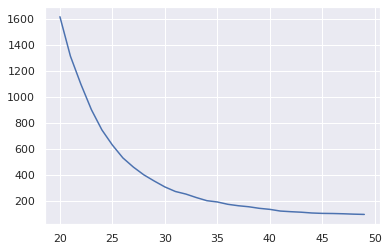

In [ ]:
plt.plot(range(20, 50), [df[df['total_sessions_day0'] > i]['total_sessions_day0'].count() for i in range(20, 50)])

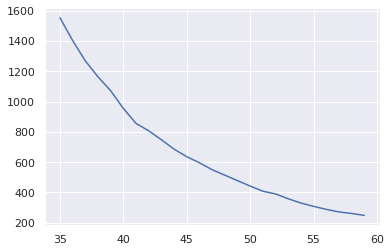

In [ ]:
plt.plot(range(35, 60), [df[df['total_sessions_day1'] > i]['total_sessions_day1'].count() for i in range(35, 60)])

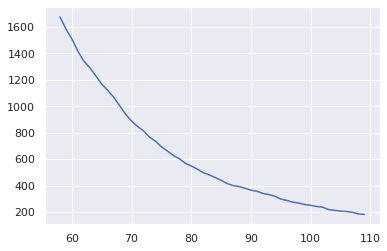

In [ ]:
plt.plot(range(58, 110), [df[df['total_sessions_day3'] > i]['total_sessions_day3'].count() for i in range(58, 110)])

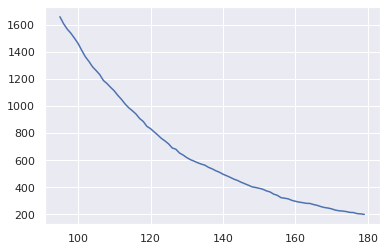

In [ ]:
plt.plot(range(95, 180), [df[df['total_sessions_day7'] > i]['total_sessions_day7'].count() for i in range(95, 180)])

Також для правильного розуміння процесів розглянемо з яких ресурсів надійшло найбільша кількість активних клієнтів.

Це допомагає нам зрозуміти на яких медіа резурсів слід зосереджуватись та допомагає виявити аномалії.

In [ ]:
sns.jointplot(x = 'total_sessions_day7', y = 'media_source', data = df)

Як ми бачимо з результатів найбільша плотність клієнтів знаходиться в 3 медіа резурсах це SOURCE_4, SOURCE_17, SOURCE_23.

Проведемо аналіз доходності наших медіа реусрсів.

In [ ]:
pd.concat([df.groupby(['media_source'])['media_source'].count() / len(df) * 100, df.groupby(['media_source'])['target_full_ltv_day30'].sum()], axis=1).sort_values(by='target_full_ltv_day30')

Як можна побачити в цій таблиці, в якій ми провели аналіз які медіа резурси приносять прибутку, що SOURCE_20, SOURCE_13, SOURCE_0, SOURCE_15 не принесли прибутку більше 1 цента, тому ми радимо для оптимізації бізнес процесів припинити співробітництво з цими медіа ресурсами.

Також проведемо аналіз залежності кількості сесій за 7 днів від платформи, що доасть нам можливість оцінити кількість активних користувачів на обох платформаах.

In [ ]:
sns.jointplot(x = 'total_sessions_day7', y = 'platform', data = df)

In [ ]:
pd.concat([df.groupby(['platform'])['platform'].count() / len(df) * 100, df.groupby(['platform'])['target_full_ltv_day30'].sum()], axis=1).sort_values(by='target_full_ltv_day30')

,platform,target_full_ltv_day30
platform,,
android,60.458281,88103.127418
ios,39.541719,288943.060867


З отриманих результатів робимо висновок, що клієнти з IOS приносять більшу доходність, проте мають аномалії в поведінці.

Після цього вирішили порівняти залежності сесій від країн та отримали досить цікаві результати.

In [ ]:
fig=plt.figure(figsize=(30, 20))
sns.jointplot(x = 'total_sessions_day7', y = 'country_code', data = df)

In [ ]:
pd.concat([df.groupby(['country_code'])['country_code'].count() / len(df) * 100, df.groupby(['country_code'])['target_full_ltv_day30'].sum()], axis=1).sort_values(by='target_full_ltv_day30')

На даних результатах можемо побачити, що найбільшу доходність приносять 4 країни COUNTRY_72, COUNTRY_38, COUNTRY_155, COUNTRY_141 і можемо зосередити увагу алгоритму саме на цих країнах.

### Неправильні значення в даних, що логічно не вкладаються в модель бізнесу###

Логічно було б висунути гіпотезу, що витрачених кристалів не може бути більше за кількість кристалів, що були отримані.

Перевіряємо дану гіпотезу.

In [ ]:
df['diamonds_diff'] = df['diamonds_received_day7'] - df['diamonds_spent_day7']
df[df['diamonds_received_day7'] < df['diamonds_spent_day7']][['diamonds_received_day7', 'diamonds_spent_day7', 'diamonds_diff']].sort_values(by=['diamonds_diff']).head(15)

,diamonds_received_day7,diamonds_spent_day7,diamonds_diff


Як ми бачимо існують такі дані. Можна спробувати пояснити їх тим, що це за допомогою підписки отримується така різниця, проте ми вважаємо що це викид системи, тому ми видалимо такі дані для покращення подальшої роботи.

З точки зору бізнес процесів рекомендовано передивитись яким чином клієнт може мати настількі великі різниці в коисталах, та виправити цю проблему.


Тепер також висунемо гіпотезу про те що не може бути завершено більше глав ніж було вікрито.
Далі перевіримо цю гіпотезу.

In [ ]:
df['chapters_diff'] = df['chapters_opened_day7'] - df['chapters_finished_day7']
df[df['chapters_opened_day7'] < df['chapters_finished_day7']][['chapters_opened_day7', 'chapters_finished_day7', 'chapters_diff']].sort_values(by=['chapters_diff']).head(15)

,chapters_opened_day7,chapters_finished_day7,chapters_diff


Як ми бачимо з результатів такої перевірки то існує проблема з системо підрахунку глав.

Від таких даних також очистимо нашу вибірку для подальшої роботи.

### Фільтри ###

Видаляємо Na значення

In [ ]:
len_before = len(df)
print(f"df len: {len_before}")

na_subset = df[df.isna().any(axis=1)]
print(na_subset.iloc[:5, :3])

df = df.dropna()
print(f"\ndroped: {len_before - len(df)}")

droped_in_total = len_before - len(df)

df len: 1467832
     total_sessions_day0  total_sessions_day1  total_sessions_day3
29                   NaN                  NaN                  NaN
52                   NaN                  NaN                  NaN
99                   NaN                  NaN                  NaN
130                  NaN                  NaN                  NaN
222                  NaN                  NaN                  NaN

droped: 1374


Видаляємо від'ємні значення

In [ ]:
len_before = len(df)
print(f"df len: {len_before}")

negative_subset = df[(df['total_sessions_day7'] < 0) |
                     (df['chapters_finished_day7'] < 0) | (df['chapters_opened_day7'] < 0) | (df['chapters_closed_day7'] < 0) |
                     (df['diamonds_received_day7'] < 0) | (df['diamonds_spent_day7'] < 0) | (df['tickets_spent_day7'] < 0) |
                     (df['chapters_finished_session9'] < 0) | (df['chapters_opened_session9'] < 0) | (df['chapters_closed_session9'] < 0) |
                     (df['diamonds_spent_session9'] < 0) | (df['tickets_spent_session9'] < 0) |
                     (df['app_sub_ltv_day3'] < 0) | (df['app_iap_ltv_day3'] < 0) | (df['ad_ltv_day3'] < 0) |
                     (df['target_sub_ltv_day30'] < 0) | (df['target_iap_ltv_day30'] < 0) | (df['target_ad_ltv_day30'] < 0) | (df['target_full_ltv_day30'] < 0)]
print(negative_subset.iloc[:5, :3])

df = df[(df['total_sessions_day7'] >= 0) &
        (df['chapters_finished_day7'] >= 0) & (df['chapters_opened_day7'] >= 0) & (df['chapters_closed_day7'] >= 0) &
        (df['diamonds_received_day7'] >= 0) & (df['diamonds_spent_day7'] >= 0) & (df['tickets_spent_day7'] >= 0) &
        (df['chapters_finished_session9'] >= 0) & (df['chapters_opened_session9'] >= 0) & (df['chapters_closed_session9'] >= 0) &
        (df['diamonds_spent_session9'] >= 0) & (df['tickets_spent_session9'] >= 0) &
        (df['app_sub_ltv_day3'] >= 0) & (df['app_iap_ltv_day3'] >= 0) & (df['ad_ltv_day3'] >= 0) &
        (df['target_sub_ltv_day30'] >= 0) & (df['target_iap_ltv_day30'] >= 0) & (df['target_ad_ltv_day30'] >= 0) & (df['target_full_ltv_day30'] >= 0)]

print(f"droped: {len_before - len(df)}")

droped_in_total += len_before - len(df)

df len: 1466458
         total_sessions_day0  total_sessions_day1  total_sessions_day3
324112                   1.0                  1.0                  1.0
374828                   0.0                 67.0                 67.0
449835                  16.0                 49.0                 51.0
1026084                  3.0                  6.0                  7.0
droped: 4


Видаляємо викиди моделі, що ми знаходили в попередніх розділах.

In [ ]:
len_before = len(df)
print(f"df len: {len_before}")


emissions_subset = df[(df['total_sessions_day0'] >= 25) | (df['total_sessions_day1'] >= 40) |
                      (df['total_sessions_day3'] >= 60) | (df['total_sessions_day7'] >= 100)]
print(emissions_subset.iloc[:5, :3])

df = df[(df['total_sessions_day0'] < 25) & (df['total_sessions_day1'] < 40) &
        (df['total_sessions_day3'] < 60) & (df['total_sessions_day7'] < 100)]

print(f"droped: {len_before - len(df)}")

droped_in_total += len_before - len(df)

df len: 1466454
      total_sessions_day0  total_sessions_day1  total_sessions_day3
3098                 47.0                 47.0                 47.0
5315                 39.0                 39.0                 40.0
5628                 26.0                 37.0                 61.0
5651                309.0                311.0                311.0
5800                 28.0                 39.0                 39.0
droped: 2626


Тепер видаляємо строки де кристали витрачені перевищують значення отриманих.

In [ ]:
len_before = len(df)
print(f"df len: {len_before}")

diamonds_bug_subset = df[df['diamonds_received_day7'] < df['diamonds_spent_day7']]
print(diamonds_bug_subset.iloc[:5, :3])

df = df[df['diamonds_received_day7'] >= df['diamonds_spent_day7']]

print(f"droped: {len_before - len(df)}")

droped_in_total += len_before - len(df)

df len: 1463828
      total_sessions_day0  total_sessions_day1  total_sessions_day3
646                   1.0                  1.0                  1.0
647                   1.0                  1.0                  1.0
650                   1.0                  1.0                  1.0
1171                  1.0                  2.0                  2.0
3167                  1.0                  1.0                  1.0
droped: 6234


Тепер видаляємо строки де глави закінчені перевищують значення відкритих.

In [ ]:
len_before = len(df)
print(f"df len: {len_before}")

chapters_bug_subset = df[df['chapters_opened_day7'] < df['chapters_finished_day7']]
print(chapters_bug_subset.iloc[:5, :3])

df = df[df['chapters_opened_day7'] >= df['chapters_finished_day7']]

print(f"droped: {len_before - len(df)}")

droped_in_total += len_before - len(df)

df len: 1457594
       total_sessions_day0  total_sessions_day1  total_sessions_day3
39367                  7.0                  7.0                  9.0
57190                  8.0                  8.0                  8.0
57198                  8.0                 24.0                 25.0
84984                 12.0                 37.0                 38.0
95972                  3.0                  6.0                 19.0
droped: 54


In [ ]:
print(f"droped in total: {droped_in_total}")

droped in total: 10292


Після виконання всіх цих фільтрів ми очистили наш датасет від неправильних, неадекватних даних. Сумарно ми очистили наш датасет від 10292 строк, що складає 0.69%. 

Це значення не є великим проте, для чутливої моделі навіть такі відсотки є важливими, як мінімум тим, що алгоритм може вважати, що отримання в прогнозуванні такого типу даних норма і виставляти схожі, що сильно погіршує процент успішності прогнозування.

# Кореляції #

В даному розідлі ми побудували кореляційні матриці, щоб побачити силу кореляції змінних між собою для знаходження взаємозв'язків, котрі в подальшому можемо використати для полегшення нашого датасету та зменшення часу роботи.


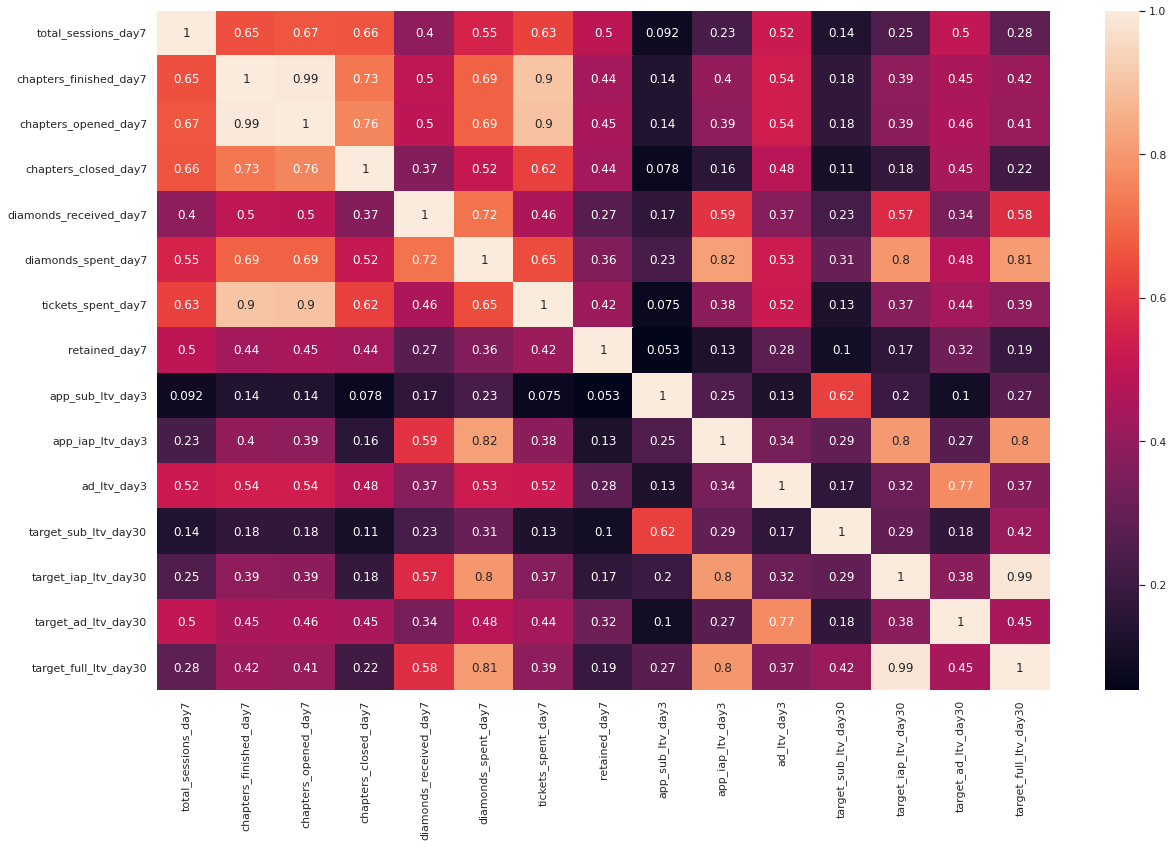

In [ ]:
df_subset = df[['total_sessions_day7',
                'chapters_finished_day7', 'chapters_opened_day7', 'chapters_closed_day7',
                'diamonds_received_day7', 'diamonds_spent_day7', 'tickets_spent_day7',
                'retained_day7',
                'media_source', 'install_date', 'country_code', 'platform',
                'app_sub_ltv_day3', 'app_iap_ltv_day3', 'ad_ltv_day3',
                'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']]

fig=plt.figure(figsize=(20, 12.5))
sns.heatmap(df_subset.corr(),annot=True)

З побудованої ковараційної матриці, розфарбованої градієнтним способом ми явно бачимо цікаві взаємозв'язки між змінними. 
А саме 
chapters_finished_day7-chapters_opened_day7, що зрозуміло із логіки бізнеса
chapters_finished_day7-tickets_spent_day7, що також пояснується логікою,
target_full_ltv_day30 має високі залежності від diamonds_received_day7, diamonds_spent_day7, app_iap_ltv_day3 та target_iap_ltv_day30, що дає цікаві спостереження, що основною складовою прибутку від клієнта є купівля кристалів.

Саме через це було раніше запропоновано передивитись логіку стосовно підписок і того, що клієнти витрачають кристалів більше за отримання.

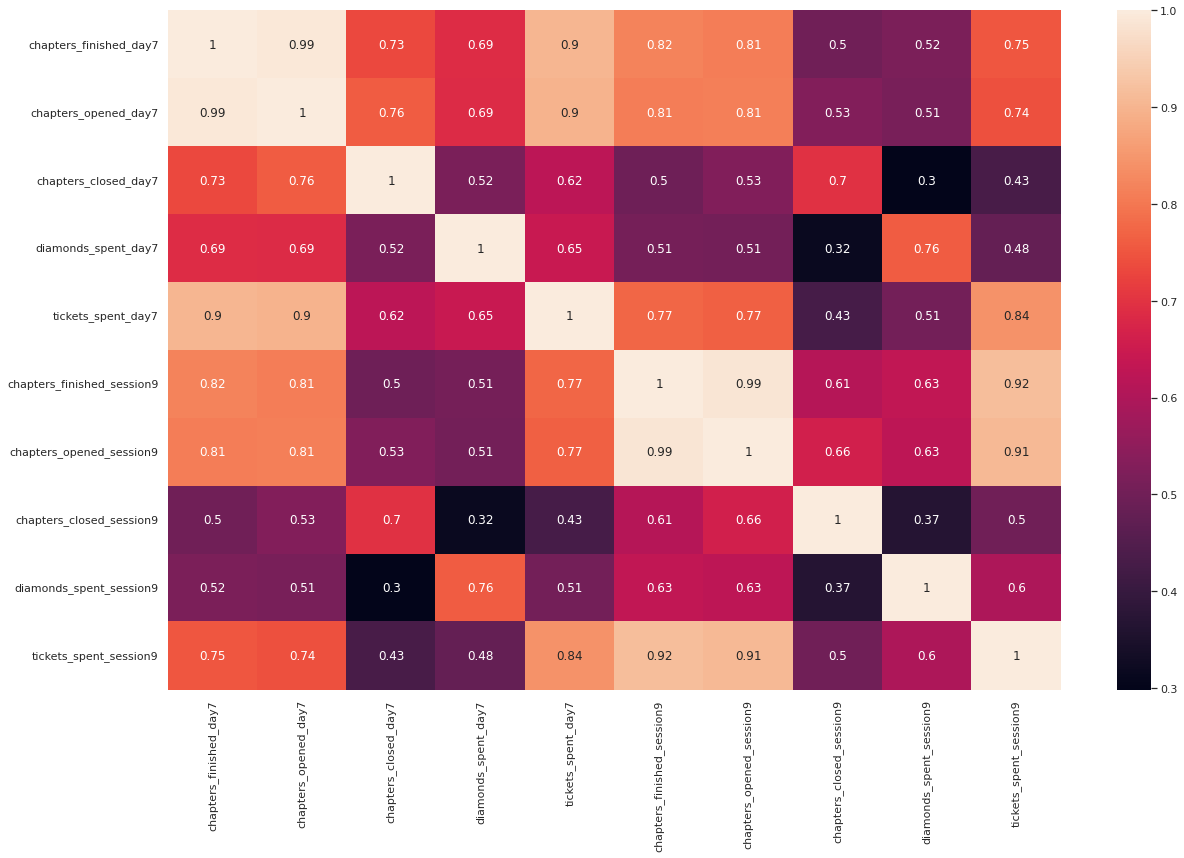

In [ ]:
df_subset = df[['chapters_finished_day7', 'chapters_opened_day7', 'chapters_closed_day7',
                'diamonds_spent_day7', 'tickets_spent_day7',
                'chapters_finished_session9', 'chapters_opened_session9', 'chapters_closed_session9',
                'diamonds_spent_session9', 'tickets_spent_session9',]]

fig=plt.figure(figsize=(20, 12.5))
sns.heatmap(df_subset.corr(),annot=True)

З цієї кореляційної матриці бачимо є зв'язок між тікетами витраченими за сесію та за день, що дозволяє вибирати одну з колонок. 

Аналогічна ситуація з главами, що теж дозволяє суттєво зменшити наш датасет без втрат у продуктивності.


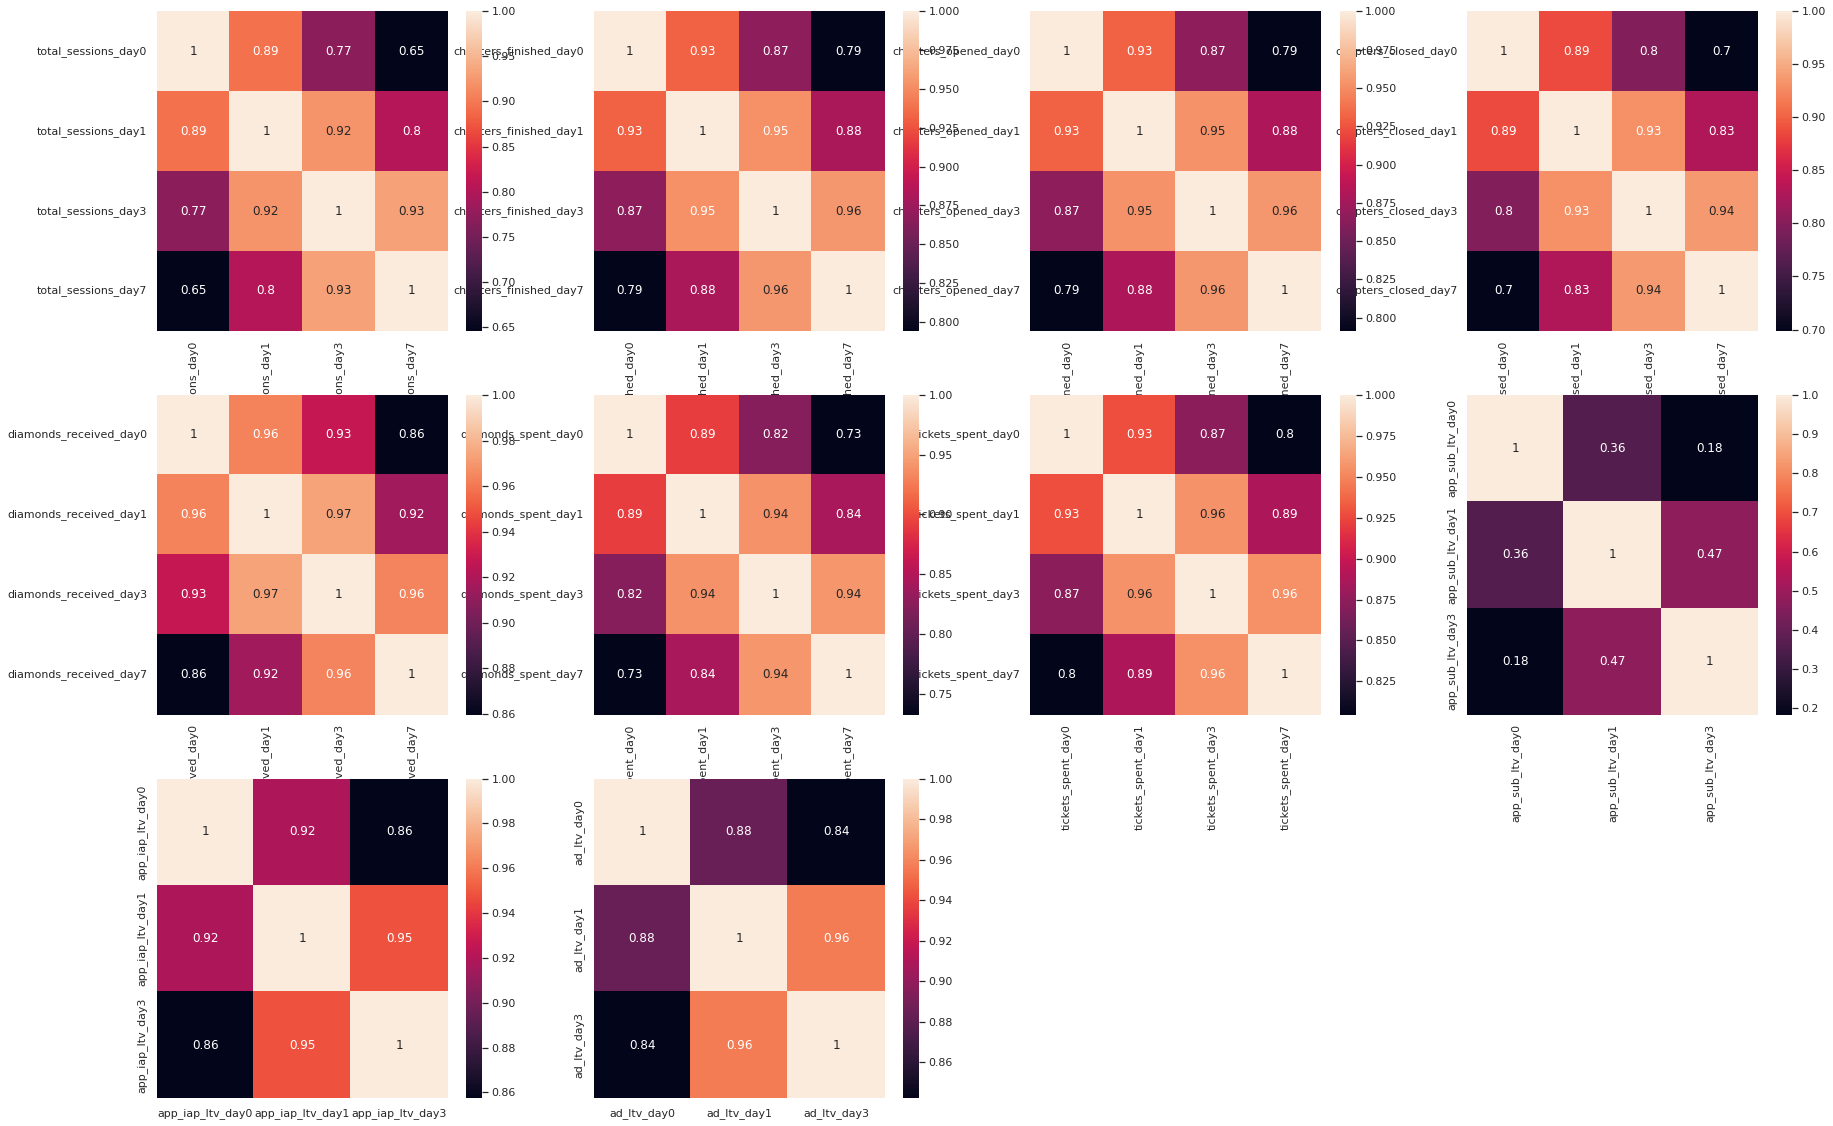

In [ ]:
fig, axes = plt.subplots(3, 4)
fig.set_size_inches(30, 20)

column_list = [['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7'], 
               ['chapters_finished_day0', 'chapters_finished_day1', 'chapters_finished_day3', 'chapters_finished_day7'], 
               ['chapters_opened_day0', 'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7'], 
               ['chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3', 'chapters_closed_day7'], 
               ['diamonds_received_day0', 'diamonds_received_day1', 'diamonds_received_day3', 'diamonds_received_day7'], 
               ['diamonds_spent_day0', 'diamonds_spent_day1', 'diamonds_spent_day3', 'diamonds_spent_day7'], 
               ['tickets_spent_day0', 'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7'], 
               ['app_sub_ltv_day0', 'app_sub_ltv_day1', 'app_sub_ltv_day3'], 
               ['app_iap_ltv_day0', 'app_iap_ltv_day1', 'app_iap_ltv_day3'], 
               ['ad_ltv_day0', 'ad_ltv_day1', 'ad_ltv_day3']]

for i, columns in enumerate(column_list):
    df_subset = df[columns]
    sns.heatmap(df_subset.corr(), annot=True, ax=axes.flatten()[i])

for i in range(2, 4):
    fig.delaxes(axes[2, i])

Також проаналізували кореляцію усіх значень від кількості днів та між собою, чи мають вони зв'язок в часі. 

Також можна побачити різні цікавості закономірності та взаємозв'язки, що дозволить оптимізувати роботу алгоритму без втрат результативності.

Дані, що сильно корелюють між собою, зображено на графіках нижче для наочності

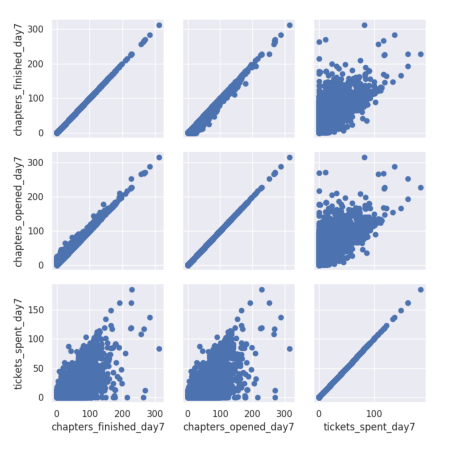

In [ ]:
image = img.imread('/content/drive/MyDrive/plot/chapters-tickets.png')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

ax.imshow(image)
plt.axis('off')
plt.show()

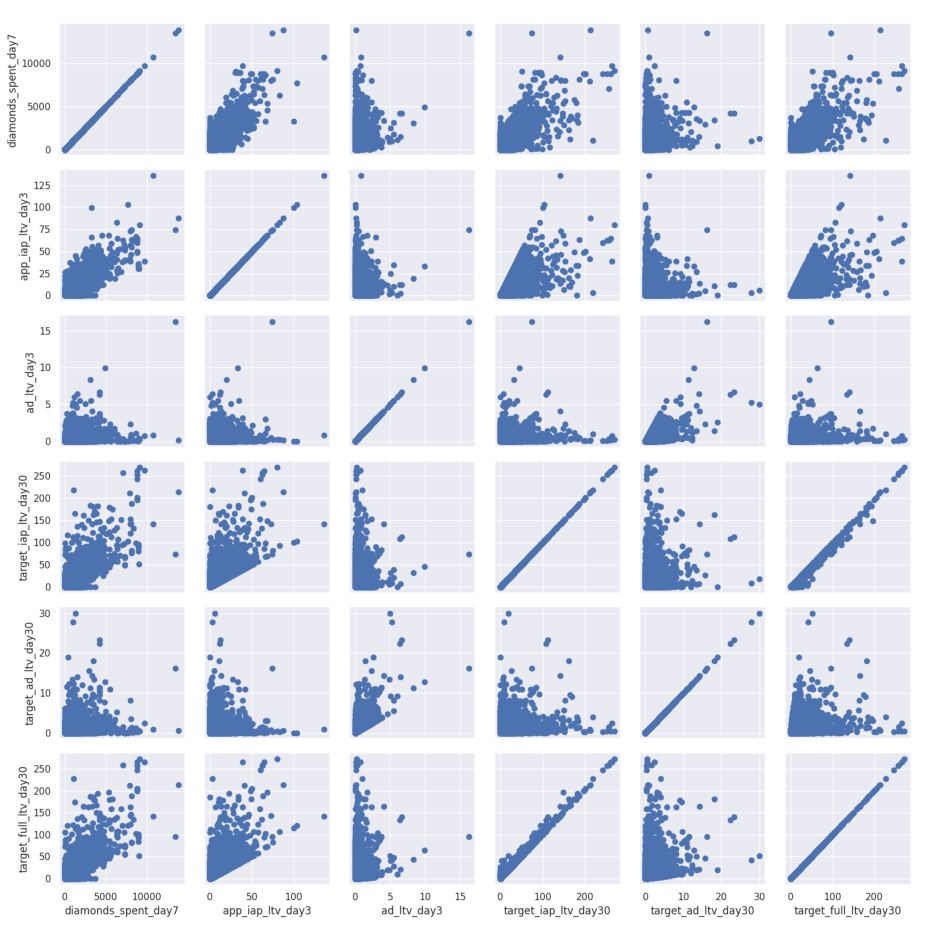

In [ ]:
image = img.imread('/content/drive/MyDrive/plot/diamonds-targets.png')

fig = plt.figure(figsize=(17, 17))
ax = fig.add_subplot()

ax.imshow(image)
plt.axis('off')
plt.show()

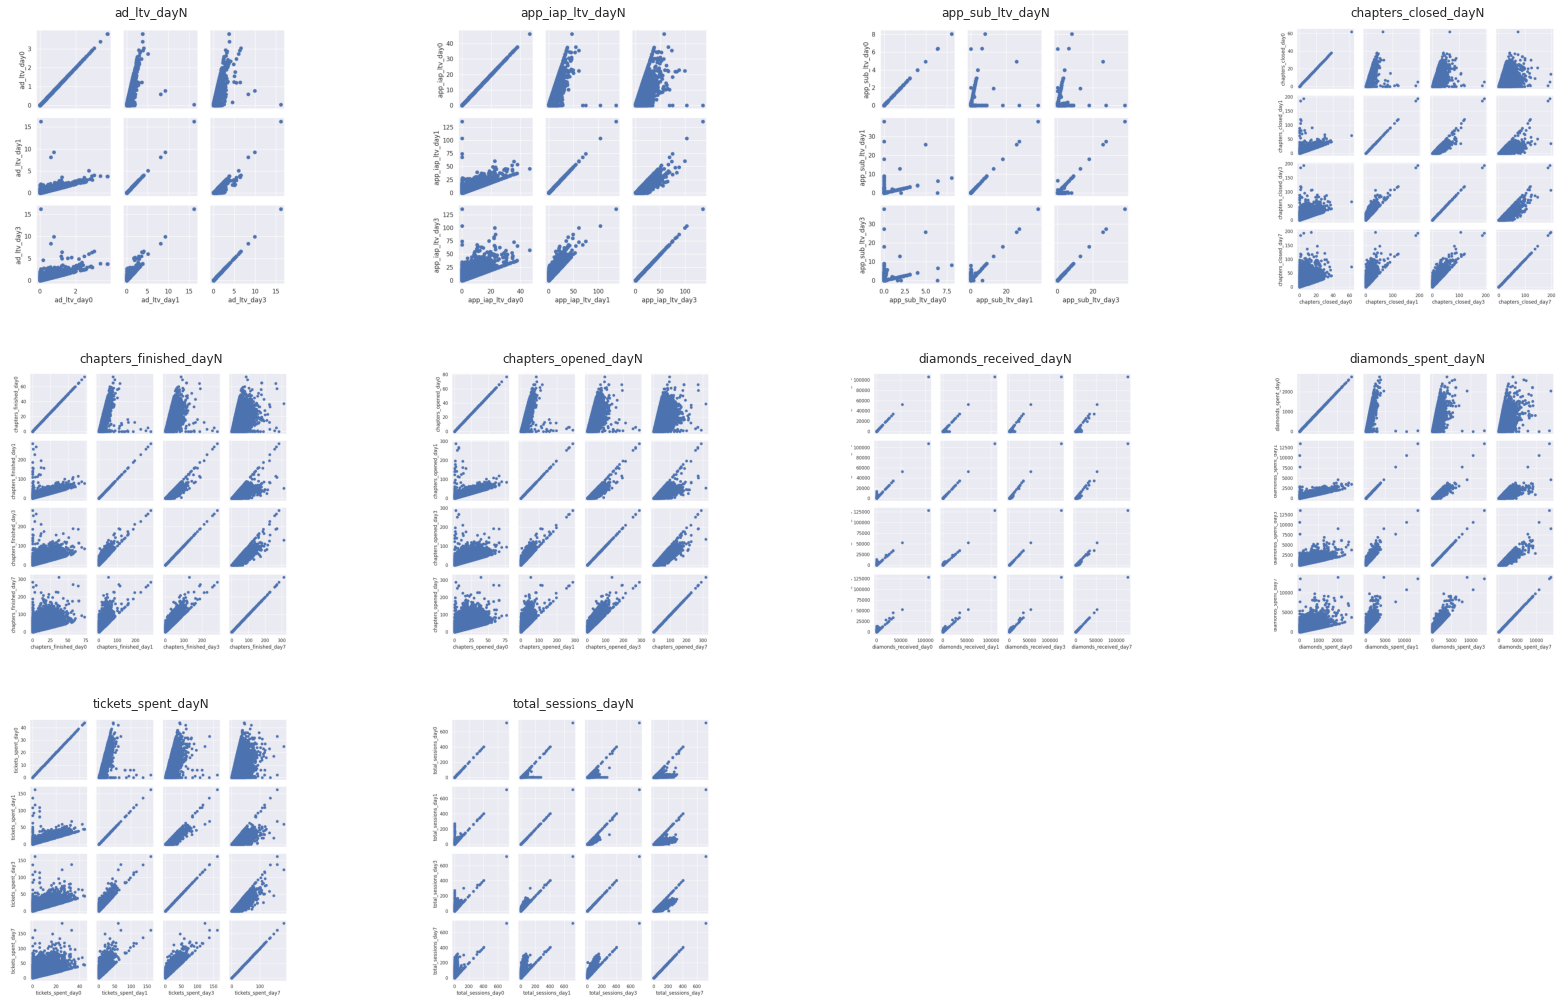

In [ ]:
fig, axes = plt.subplots(3, 4)
fig.set_size_inches(29, 18)

files_list = ['ad_ltv_dayN.png', 'app_iap_ltv_dayN.png', 'app_sub_ltv_dayN.png',
              'chapters_closed_dayN.png', 'chapters_finished_dayN.png', 'chapters_opened_dayN.png',
              'diamonds_received_dayN.png', 'diamonds_spent_dayN.png', 'tickets_spent_dayN.png',
              'total_sessions_dayN.png']

for i, filename in enumerate(files_list):
  image = img.imread('/content/drive/MyDrive/plot/' + filename)

  axes.flatten()[i].imshow(image)
  axes.flatten()[i].axis('off')
  axes.flatten()[i].set_title(filename[:-4])

for i in range(2, 4):
    fig.delaxes(axes[2, i])

# Різні датасети для тренування моделей #


Датасет, що ми отримали з минулого етапу нашої роботи використовується тут задля можливості цікавих датасетів для тренування моделей.

Нижче описані фінкції по видаленню певних даних для формування різних варіацій нашого датасету.

1. Оскільки chapters_finished та chapters_opened майже завжди рівні та мають високу кореляцію, що видно з минулого розділу.

2. Також між tickets_spent та chapters_finished кореляція становить 0.9.

З цього ми можемо зробити певні висновки та залишити лише chapters_finished.

In [ ]:
def drop_chapters_tickets(subset):
   return subset.drop(['chapters_opened_day0', 'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
                       'tickets_spent_day0', 'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7'], axis=1)

1. Між parameter_action_dayN і parameter_action_sessionN сильна кореляція. Є сенс використовувати тільки один з параметрів, оскільки їх суть одна - активність користувача

залишимо тільки *_day

In [ ]:
def drop_sessions(subset):
  return subset.drop(['chapters_finished_session1', 'chapters_finished_session3', 'chapters_finished_session9',
                      'chapters_opened_session1', 'chapters_opened_session3', 'chapters_opened_session9',
                      'chapters_closed_session1', 'chapters_closed_session3', 'chapters_closed_session9',
                      'diamonds_spent_session1', 'diamonds_spent_session3', 'diamonds_spent_session9',
                      'tickets_spent_session1', 'tickets_spent_session3', 'tickets_spent_session9'], axis=1)

Між parameter_action_dayN для різних N велика кореляція. Виняток N = 0: він не так однозначно визначає активність у подальші дні

залишимо тільки N = 0, 7

In [ ]:
def drop_days(subset):
  return subset.drop(['total_sessions_day1', 'total_sessions_day3',
                      'chapters_finished_day1', 'chapters_finished_day3',
                      'chapters_closed_day1', 'chapters_closed_day3',
                      'diamonds_received_day1', 'diamonds_received_day3',
                      'diamonds_spent_day1', 'diamonds_spent_day3'], axis=1)

Збереження

In [ ]:
df.to_csv('/content/drive/MyDrive/datasets/full_set.csv', index=False)

###**Висновки**###


В цьому файлі ми провели EDA аналіз нашого датасету.

Ми провели пошук та видалення значень, що погіршували якість даних.
Таким чином ми оптимузовуємо роботу подальшого алгоритму та покращуємо наші результати. 
Також був проведений аналіз викидів, що також погіршують якість і ускладнюють роботу.
Під час аналізу було виявлено декілька проблем в бізнес процесах, що погіршують дані та зменшують доходи компанії. Було запропоноване первине рішення цих питань.

Було висунуто гіпотези стосовно залежнасті доходів від клієнта від кристалів в грі.

Наступна частина роботи знаходиться в файлі "DS_Champ.ipynb". Там знаходяться фінальні висновки по роботі.

Best regards, team "Checkinst".